# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# Loading the dataset

In [ ]:
# Load the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the CSV file 
df=pd.read_csv(r'/content/drive/MyDrive/Data_Science/Capstone_Projects/Classification/Sentiment Analysis/Coronavirus Tweets.csv',
               encoding='latin-1')

# To preview the dataset
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# Dataset Inspection

In [ ]:
# inspection-function is to see the size of the dataset, check for null values andcheck for duplicate rows

def inspection(df):
  print(df.info(),'\n\n\n\n')
  print('The shape of the dataset is',df.shape,'\n\n\n\n')
  print(" The Null Values in the dataset are",df.isna().sum(),'\n\n\n\n')
  print(" The number of duplicate rows in the dataset are",df.duplicated().sum(),'\n\n\n\n')

In [ ]:
# To inpect the dataset
inspection(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None 




The shape of the dataset is (41157, 6) 




 The Null Values in the dataset are UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64 




 The number of duplicate rows in the dataset are 0 






In [ ]:
def df_clean(df,x):

  # Label Encoding -  column 'sentiment' contains 5 unique values.
  # extremely positive and extremely negative will be replaced with positive and ngative repectively

  df[x]=df[x].map({'Extremely Positive':'Positive',
                                     'Extremely Negative':'Negative',
                                     'Positive':'Positive',
                                     'Negative':'Negative',
                                     'Neutral':'Neutral'})
  return df

In [ ]:
df_clean(df,'Sentiment')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

# Text Preprocessing

In [ ]:
# To check for length of words
df['length'] = df['OriginalTweet'].apply(len)

In [ ]:
# Import required libraries
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Import required libraries for text preprocessing 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# clean_text - function to remove the username, remove the numbers and punctuations and also remove the common words
def clean_text(dataframe,column_name):
  dataframe['clean_tweet'] = dataframe[column_name].str.replace("@[\w]*",'')
  dataframe['clean_tweet'] = dataframe['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
  dataframe['clean_tweet'] = dataframe['clean_tweet'].apply(lambda x : [word for word in x.split() if word.lower() not in stopwords.words('english')])
  dataframe['clean_tweet'] = dataframe['clean_tweet'].apply(lambda x :' '.join((([lemmatizer.lemmatize(word) for word in x ]))))
  return dataframe['clean_tweet']

In [ ]:
# Clean the text 
clean_text(df,'OriginalTweet')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0        http co iFz FAn Pa http co xX ghGFzCC http co ...
1        advice Talk neighbour family exchange phone nu...
2        Coronavirus Australia Woolworths give elderly ...
3        food stock one empty PLEASE panic ENOUGH FOOD ...
4        ready go supermarket #COVID outbreak paranoid ...
                               ...                        
41152    Airline pilot offering stock supermarket shelf...
41153    Response complaint provided citing COVID relat...
41154    know getting tough rationing toilet paper #cor...
41155    wrong smell hand sanitizer starting turn #coro...
41156    Well new used Rift going Amazon rn although no...
Name: clean_tweet, Length: 41157, dtype: object

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length,clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,http co iFz FAn Pa http co xX ghGFzCC http co ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,advice Talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,food stock one empty PLEASE panic ENOUGH FOOD ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,310,ready go supermarket #COVID outbreak paranoid ...


# Exploratory Data Analysis

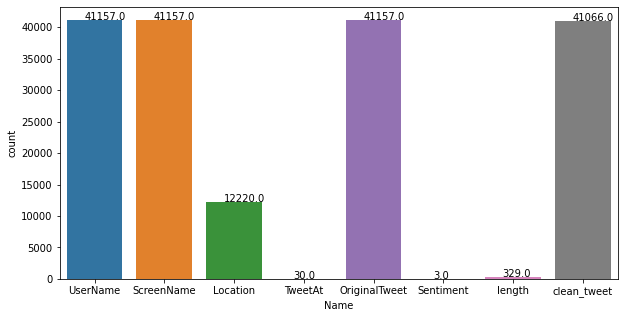

In [ ]:
#@title To determine the unique values in each column
def unique_values(df):
  uv = df.nunique().reset_index()
  uv.columns=['Name','count']
  ax = sns.barplot(data=uv,x='Name',y='count')
  for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

    
# To determine unique values in our dataset
plt.figure(figsize=(10,5))
unique_values(df)

From the graph, 

Location column shows 12220 are unique, so we will remove the columns which has 
null values.

TweetAt column shows only 30 unique values, so our dataset may contain data for a month.

Sentiment columns has 3 unique values i.e., positive,Negative,neutral

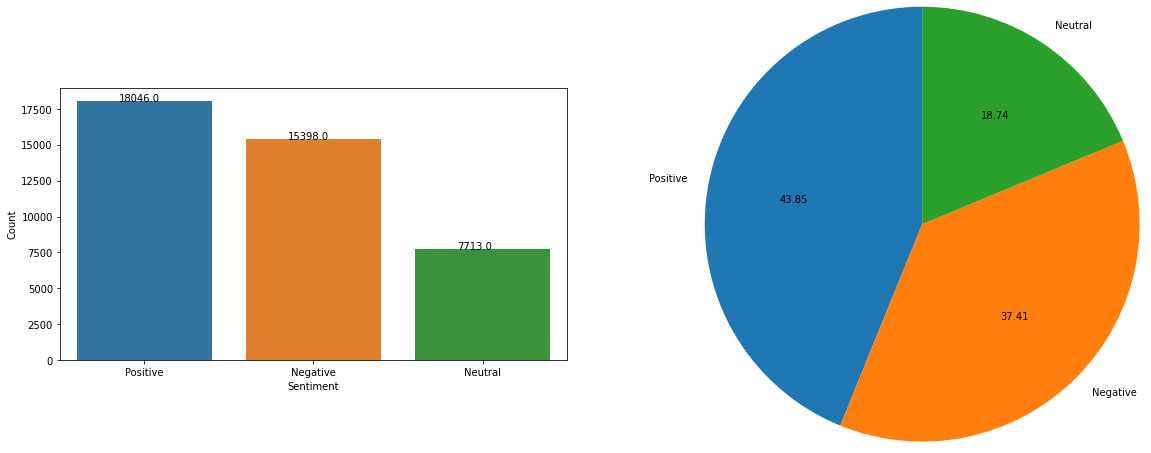

In [ ]:
#@title To visualize the unique values count of sentiment column 
def unique_column(df,column_name):
  d2=df[column_name].value_counts().reset_index()
  d2.columns=[column_name,'Count']
  
  ax = sns.barplot(data=d2,x=column_name,y='Count')
  for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# To plot pie plot for the dataset,df and the feature x
def pie_plot(df,x):
  d1 = df.groupby([x]).Sentiment.count().reset_index(name='count').nlargest(20,'count')
  d1['percentage']=((d1['count']/d1['count'].sum())*100).round(2)
  plt.pie(data=d1,x='percentage',labels=x,radius=2,startangle=-270,autopct='%.2f')


# plot the bar graph and pie chart for the dataframe,df and feature 'Sentiment
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
unique_column(df,'Sentiment')
plt.subplot(1,2,2)
pie_plot(df,'Sentiment')

from the figure, we can infer that there are more positive tweets rather than negative and neutral - The class is imbalanced

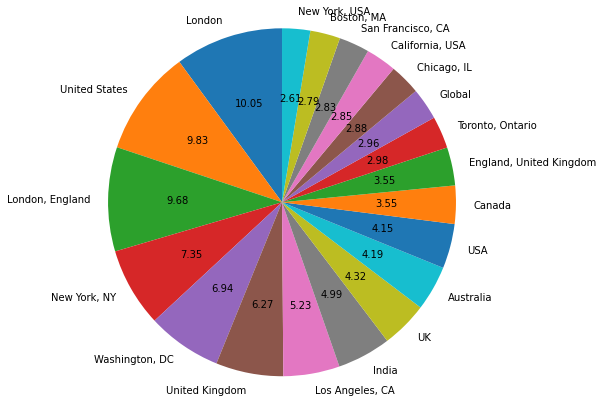

In [ ]:
#@title To visualize the top 20 location of tweets



# Top 20 locations 
pie_plot(df,'Location')

Most covid-related tweets seem to come from four major countries - United States , India , Canada , United Kingdom.

London, New York lead the way in terms of cities that tweeted the most about covid19

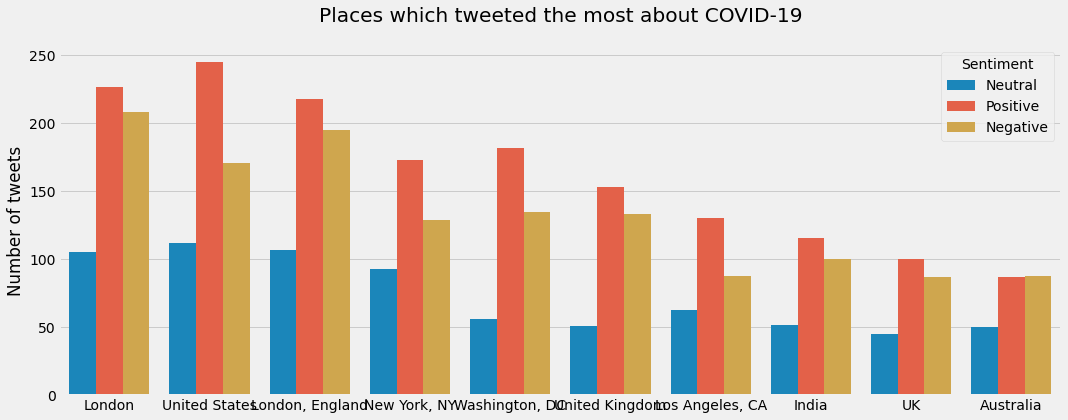

In [ ]:
#@title To Analyze the sentiments of  top 10 locations
plt.style.use("fivethirtyeight")

plt.figure(figsize=(16, 6))
location = sns.countplot(x= 'Location', data= df, hue="Sentiment", order=df.Location.value_counts()[:10].index)
location.set_title("Places which tweeted the most about COVID-19", y=1.05)

def axis_labels(ax):
    ax.set_ylabel("Number of tweets")
    ax.set_xlabel("")

axis_labels(location)

plt.show()



We also observe a pattern: there are more positive tweets than negative in all cities/countries if we combine positive and extremely positive tweets data.

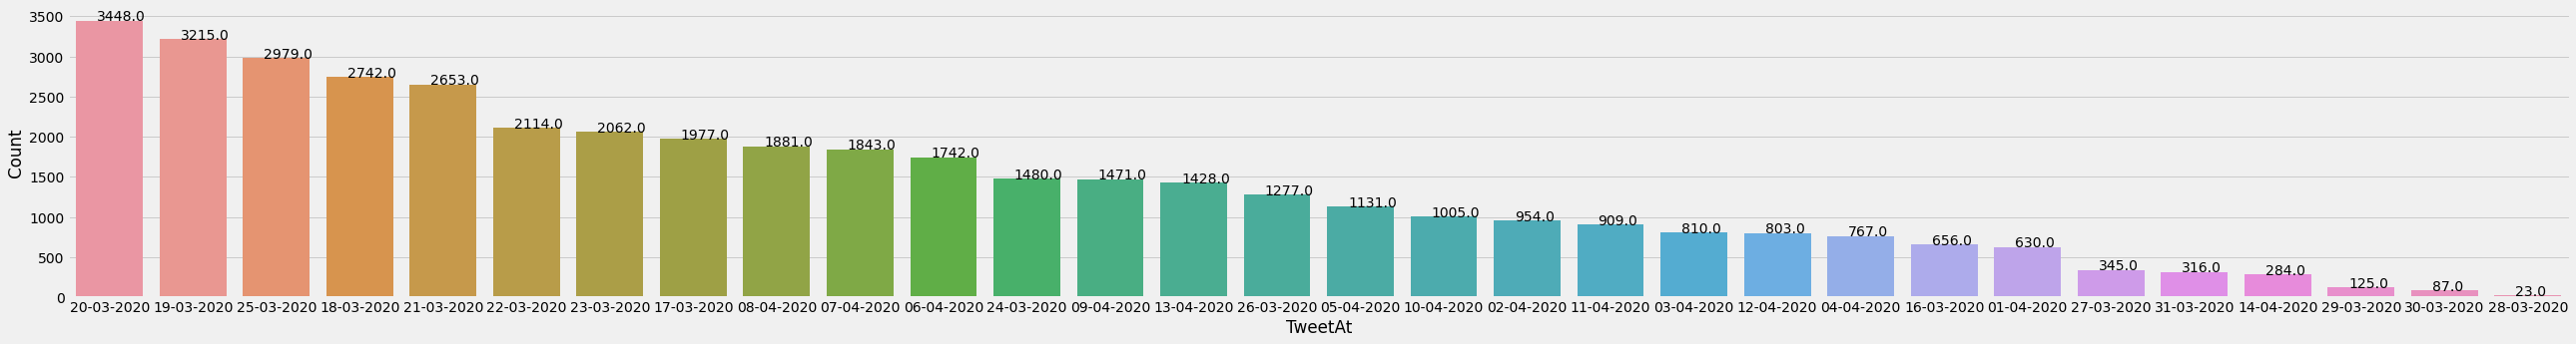

In [ ]:
#@title To visualize the date on which maximum tweets occured
plt.figure(figsize=(40,5))
unique_column(df,'TweetAt')

From the figure,  maximum number of tweets occured from 17th march 2020 to 24th march 2020

[Text(0, 0.5, 'Tweet Count'), Text(0.5, 0, 'Covid Days')]

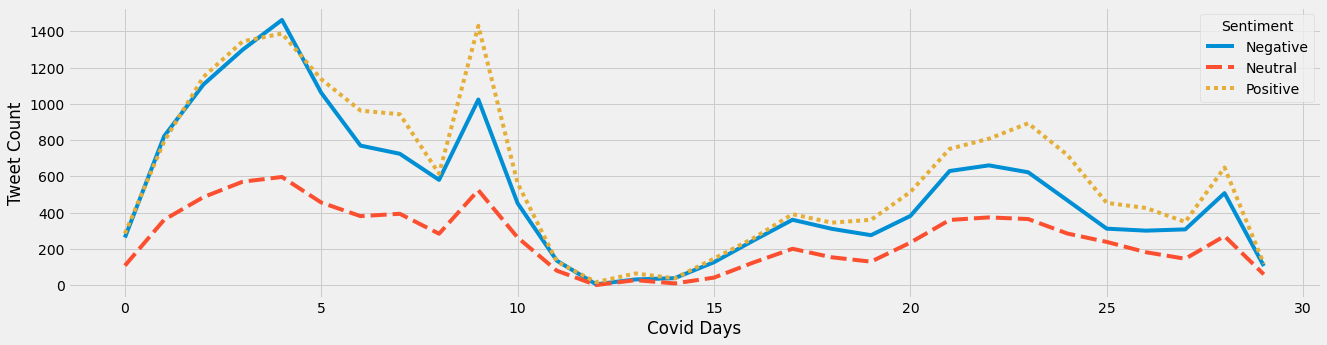

In [ ]:
# To Analyze the sentiment over the covid days
df_grouped = df.groupby(['TweetAt']).Sentiment.value_counts().unstack('Sentiment').reset_index()
df_grouped['TweetAt'] =  pd.to_datetime(df_grouped['TweetAt'],format='%d-%m-%Y')
df_grouped= df_grouped.sort_values(by=['TweetAt']).reset_index().drop(['index'],axis=1)
plt.figure(figsize=(20,5))
ax= sns.lineplot(data= df_grouped)
ax.set(xlabel='Covid Days', ylabel='Tweet Count')

from the graph,
*  positive tweets counts are higher in all the covid days.
*  In the 30 covid days of tweets,first 10 days has more number of tweets

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


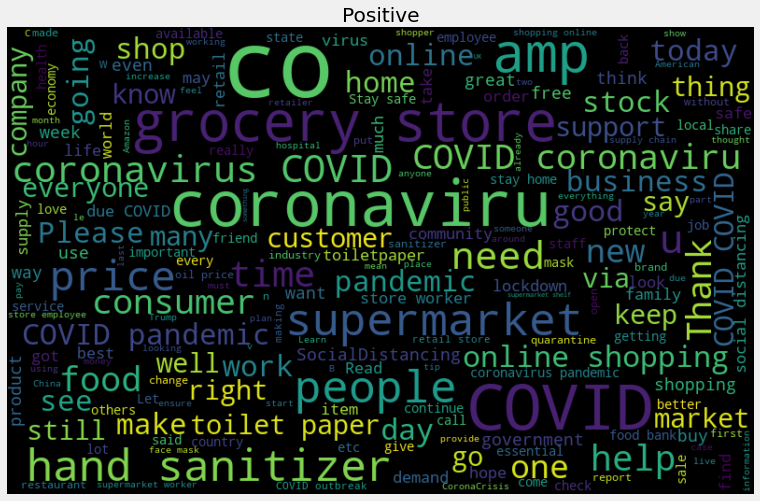

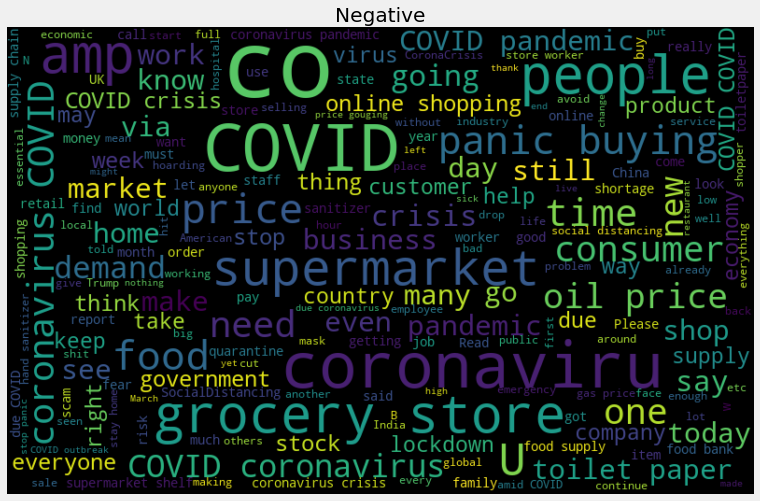

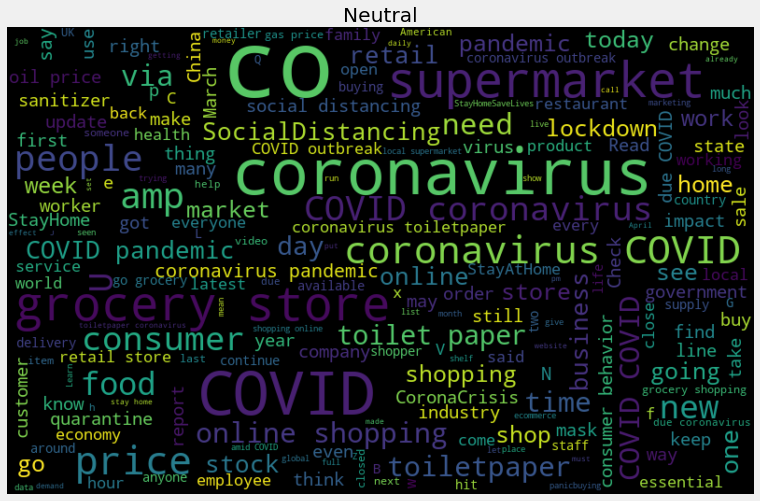

In [ ]:
#@title To visualize the  tweets-insights
from wordcloud import WordCloud

def wordcloud(x):
  all_words = " ".join([sentence for sentence in df['clean_tweet'][df['Sentiment']==x]])
  wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
  plt.figure(figsize=(20,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(x)
  plt.show()

# To plot the word cloud for sentiments - 'Positive','Negative','Neutral'

for i in ['Positive','Negative','Neutral']:
  wordcloud(i)

# Feature Engineering

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)

X = vectorizer.fit_transform(df['clean_tweet'])



*   for Independent variables, we are going to remove username and screenname column because they are for unique identity they will not affect our model.We will drop both columns.



In [ ]:
# from sklearn import preprocessing
# y = preprocessing.label_binarize(y, classes=['Positive','Negative','Neutral'])

In [ ]:
df['Sentiment']=df['Sentiment'].map({'Positive':2,'Negative':0,'Neutral':1})

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, df['Sentiment'], random_state=42, test_size=0.25,stratify = df['Sentiment'] )

# ML Model

In [ ]:
# Import required classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

# hyperparameter tuning using randomized search cv
from sklearn.model_selection import RandomizedSearchCV

# Classification model metrics
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,precision_score,recall_score

Evaluation Metrics

In [ ]:
# Metric Table is created to compare the r2 score and RMSE score for different regression models


def classification_metrics(x_train,x_test,y_train,y_test):
  metrics_table = pd.DataFrame(columns=['Classification_Model', 'Train_auc_roc_score', 'Test_auc_roc_score', 'Train_precision',
                                      'Test_precision','Train_Recall','Test_Recall','Train_f1-score','Test_f1-score','Train_accuracy','Test_accuracy'])
  for i,model in enumerate(grids):
    y_train_pred =model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_train_prob =model.predict_proba(x_train)
    y_test_prob = model.predict_proba(x_test)

    metrics_table.loc[len(metrics_table.index)]=(grid_dict[i],
                                                roc_auc_score(y_train, y_train_prob,multi_class='ovr'),
                                                roc_auc_score(y_test, y_test_prob,multi_class='ovr'),
                                                precision_score(y_train, y_train_pred,average='micro'),
                                                precision_score(y_test, y_test_pred,average='micro'),
                                                recall_score(y_train, y_train_pred,average='micro'),
                                                recall_score(y_test, y_test_pred,average='micro'),
                                                f1_score(y_train,y_train_pred,average='micro'),
                                                f1_score(y_test,y_test_pred,average='micro'),
                                                accuracy_score(y_train,y_train_pred),
                                                accuracy_score(y_test,y_test_pred))
  return metrics_table

ML Model

In [ ]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
nb = naive_bayes.MultinomialNB()
knn = KNeighborsClassifier()

In [ ]:
# Hyper Parameters for classification models
rf_parameters = {'max_depth': [3,5,7],
                 'min_samples_leaf': [1, 2, 5],
                 'min_samples_split': [3, 5, 9]} # Random Forest
dt_parameters = {'max_depth': [5, 10, 15],
                 'min_samples_leaf': [1, 3, 7],
                 'min_samples_split': [3, 5, 9],
                 'max_leaf_nodes': [5, 20, 100],
                 'max_features': ['auto', 'sqrt', 'log2']} # Decision Tree
xgb_parameters = {'max_depth': [2, 5, 10],
              'learning_rate': [0.05, 0.1, 0.2],
              'min_child_weight': [1, 2, 5],
              'gamma': [0, 0.1, 0.3],
              'colsample_bytree': [0.3, 0.5, 0.7]} # XGB Boost
knn_parameters = {'n_neighbors':np.arange(1,50)} # K-Nearest Neighbours
nb_parameters ={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

In [ ]:
dt_random_search = RandomizedSearchCV(estimator=dt,
                                      param_distributions=dt_parameters,
                                      scoring='accuracy',
                                      cv=2,
                                      verbose=2)
rf_random_search = RandomizedSearchCV(estimator=rf,
                                      param_distributions=rf_parameters,
                                      scoring='accuracy',
                                      cv=2,
                                      verbose=2)
xgb_random_search = RandomizedSearchCV(estimator=xgb,
                                      param_distributions=xgb_parameters,
                                      scoring='accuracy',
                                      cv=2,
                                      verbose=2)
knn_random_search = RandomizedSearchCV(estimator=knn,
                                      param_distributions=knn_parameters,
                                      scoring='accuracy',
                                      cv=2,
                                      verbose=2)
nb_random_search = RandomizedSearchCV(estimator=nb,
                                      param_distributions=nb_parameters,
                                      scoring='accuracy',
                                      cv=2,
                                      verbose=2)

In [ ]:
# To fit the x_train and y_train in all the regression models
grids = [ dt_random_search, rf_random_search, xgb_random_search, knn_random_search,nb_random_search]
for pipe in grids:
    pipe.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=15, max_features=log2, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, max_features=log2, max_leaf_nodes=5, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_features=log2, max_leaf_nodes=5, min_samples_leaf=7, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=9; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=7, min_samples_split=9

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s
[CV] END .........................................alpha=1000; total time=   0.0s


In [ ]:
grid_dict = {0: 'Decision Trees', 1: 'Random Forest', 
             2: 'XGBoost', 3: 'K-Nearest Neighbours',4:'Naive Bayes'}

In [ ]:
# To visualize the best parameter for each model
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(x_test,y_test)))
    print('{} Best Params: {}\n\n'.format(grid_dict[i],          model.best_params_))

Decision Trees Test Accuracy: 0.45811467444120507
Decision Trees Best Params: {'min_samples_split': 9, 'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'max_features': 'sqrt', 'max_depth': 15}


Random Forest Test Accuracy: 0.5050534499514091
Random Forest Best Params: {'min_samples_split': 9, 'min_samples_leaf': 5, 'max_depth': 7}


XGBoost Test Accuracy: 0.7769679300291545
XGBoost Best Params: {'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}


K-Nearest Neighbours Test Accuracy: 0.3554907677356657
K-Nearest Neighbours Best Params: {'n_neighbors': 3}


Naive Bayes Test Accuracy: 0.6943634596695821
Naive Bayes Best Params: {'alpha': 1}




In [ ]:
classification_metrics(x_train,x_test,y_train,y_test)

,Classification_Model,Train_auc_roc_score,Test_auc_roc_score,Train_precision,Test_precision,Train_Recall,Test_Recall,Train_f1-score,Test_f1-score,Train_accuracy,Test_accuracy
0,Decision Trees,0.570260,0.565699,0.458256,0.458115,0.458256,0.458115,0.458256,0.458115,0.458256,0.458115
1,Random Forest,0.821672,0.815832,0.509671,0.505053,0.509671,0.505053,0.509671,0.505053,0.509671,0.505053
2,XGBoost,0.947196,0.893984,0.841805,0.776968,0.841805,0.776968,0.841805,0.776968,0.841805,0.776968
3,K-Nearest Neighbours,0.929179,0.639421,0.540577,0.355491,0.540577,0.355491,0.540577,0.355491,0.540577,0.355491
4,Naive Bayes,0.893876,0.844075,0.753199,0.694363,0.753199,0.694363,0.753199,0.694363,0.753199,0.694363


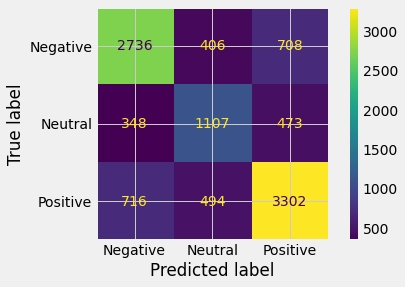

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,nb_random_search.predict(x_test))
ConfusionMatrixDisplay(cm,display_labels= ['Negative','Neutral','Positive']).plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,nb_random_search.predict(x_train)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     11548
           1       0.64      0.67      0.65      5785
           2       0.79      0.78      0.79     13534

    accuracy                           0.75     30867
   macro avg       0.73      0.74      0.74     30867
weighted avg       0.75      0.75      0.75     30867



Conclusion

From the classification- evaluation metrics 

*   Only XGBoost gives, very high score in all the parameters,followed by Naive Bayes
*   Decision tree, random forest,KNN are struggling hard for the sentiment analysis.
*   XGBoost consumes more time to train the model, but Naive Bayes consumes very less time, based on the performance and score , naive bayes algorithm is best suitable for sentiment analysis.

